In [51]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## About the Dataset

In [52]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [53]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [54]:
# Check for null values in all columns
df.isnull().sum().sum()

0

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [56]:
# Check for duplicated rows
df.duplicated(keep=False).sum()

1854

In [57]:
# Check unique values of the columns
print(df['Class'].unique())

# 1 => Fraud; 0 => Not fraud


[0 1]


In [58]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note:** Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Goal : To detect patterns nya yang give signs of fraud!!

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

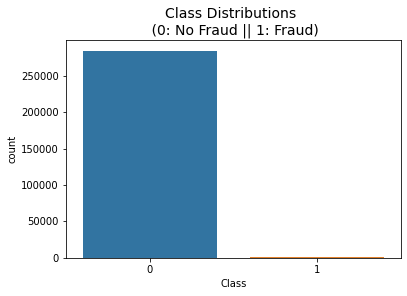

In [59]:
sns.countplot(data=df, x='Class')
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

It can be seen that the distribution is very skewed. There are techniques to reduce the skewedness

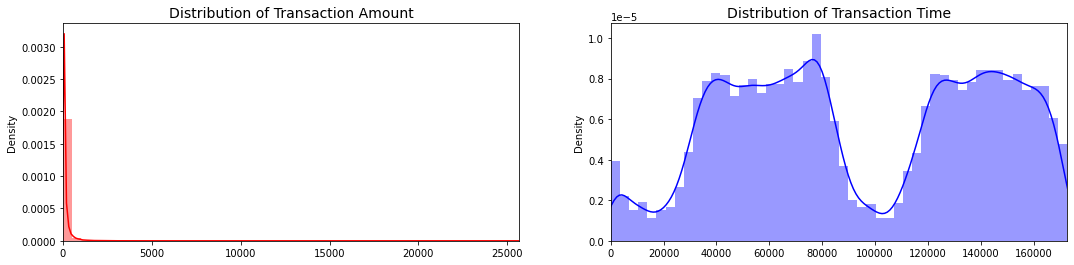

In [60]:
# There are other features that we could analyze.
# The 'Time' and 'Amount' features because it is the only features that have not been transformed with PCA
# Belum di standardize

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
# Set the x limit, so that the plot is neat in height
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

## Scaling and Distributing

We need to create a sub-sample of the Fraud and Non-fraud cases. Where both categories are equal

There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

We're going to this later in the code

In [61]:
# Scale the Amount and Time 

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
# Because our data is not normally distributed, leans heavily to one side. Hence we're going to use RobustScaler instead.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# values.reshape(-1, 1) is used to reshape a one-dimensional array or list, values, into a two-dimensional array with a single column
# the -1 means that the size of that dimension should be automatically inferred based on the length of the input.

# Karena fit_transform harus dalam bentuk array, makanya df['Amount'] and df['Time'] diubah dulu pake .values.reshape(-1, 1)
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)



In [62]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# Cuma untuk mindahin scaled_amount and scaled_time ke depan, to make it easier to see.
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting the Dataset (Original DataFrame)

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. For testing purposes, we want to test our models on the original testing set not on the testing set created by either of these techniques. 

The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

Kenapa dipisah dulu? Karena untuk testing, kita juga mau ngetest-nya pake data yang original dulu. To test the accuracy.

Because we want to test the data with both the original dataset and the undersampled dataset, that's why we need to split it first.

In [63]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [64]:
# Split the data to predictor variable (X) and target variable (Y)
X = df.drop('Class', axis=1)
y = df['Class']

Because we want to assess the existing model's performance, and we have an imbalanced dataset (leans heavily towards the No-Fraud). 

Hence, it is better to use StratifiedKFold(), instead of the train_test_split()

In [65]:
# default n_splits = 5
# Create the model
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Split X and y with that
# .split() => generates split data into training and testing data
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# The code above is similar to the once below v
# We are not using the code below (train_test_split), because we are using another model (sss) to split the data
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# We already have X_train and y_train for the undersample data 
# thats why I am using original to distinguish and to not overwrite these variables.


Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [66]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


## Random Undersampling
In order to fix the imbalanced dataset that we have. We have to undersample the 'No-Fraud' entry.
Because if we just let the data to lean towards the 'No-Fraud', the model will produce biased prediction. Which is leaning heavily towards a 'No-Fraud' classification.

Steps
1. Determine how imbalanced our dataset is. => using value_counts()
2. Bring the amount of non-fraud transaction the same as the fraud transaction
3. After implementing this technique, we will have a new sub-sample dataset with a 50/50 ratio with regards to our classes
4. Then, we want to shuffle our data, so that the models can maintain a certain accuracy everytime we run the model.

In [67]:
# Shuffle the data before creating the subsamples
# Sampling with a fraction of 1 => The same amount of data
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]       # Only take 492 of it

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

In [68]:
# Shuffle again to make sure that the models can maintain a certain accuracy everytime we run the model
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
257254,0.347935,0.862099,-0.243051,1.407894,1.506115,4.280676,0.985939,1.051460,0.669649,0.088972,...,0.444234,-0.391642,-1.221050,0.264886,0.411840,-0.692307,-0.193485,0.160741,0.183927,0
150663,4.108992,0.107626,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,...,0.055684,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1
91797,-0.230699,-0.247418,1.167516,0.169447,0.509497,0.453736,-0.201459,-0.185675,-0.085807,0.055684,...,-0.079758,-0.171226,-0.485855,0.145080,0.024221,0.127454,0.105166,-0.014379,0.006946,0
82400,-0.042199,-0.297313,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,...,2.875260,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,1
234633,-0.285195,0.744381,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,...,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1


## Equally Distributing and Correlating

### Distribution

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


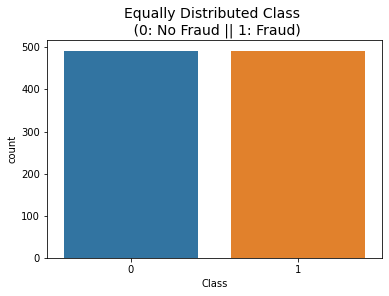

In [69]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


# Countplot is used to visualize the frequency or count of categorical variables
sns.countplot(data=new_df, x='Class')
plt.title('Equally Distributed Class \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

# The dataset is now equally distributed 

From these heat maps we want to know if there are features that heavily influenced whether a specific transaction is a fraud. It is also important to use the correct dataset (the balanced dataset), instead of the imbalanced one. Because the imbalanced dataset will cause bias. 

### Heatmaps

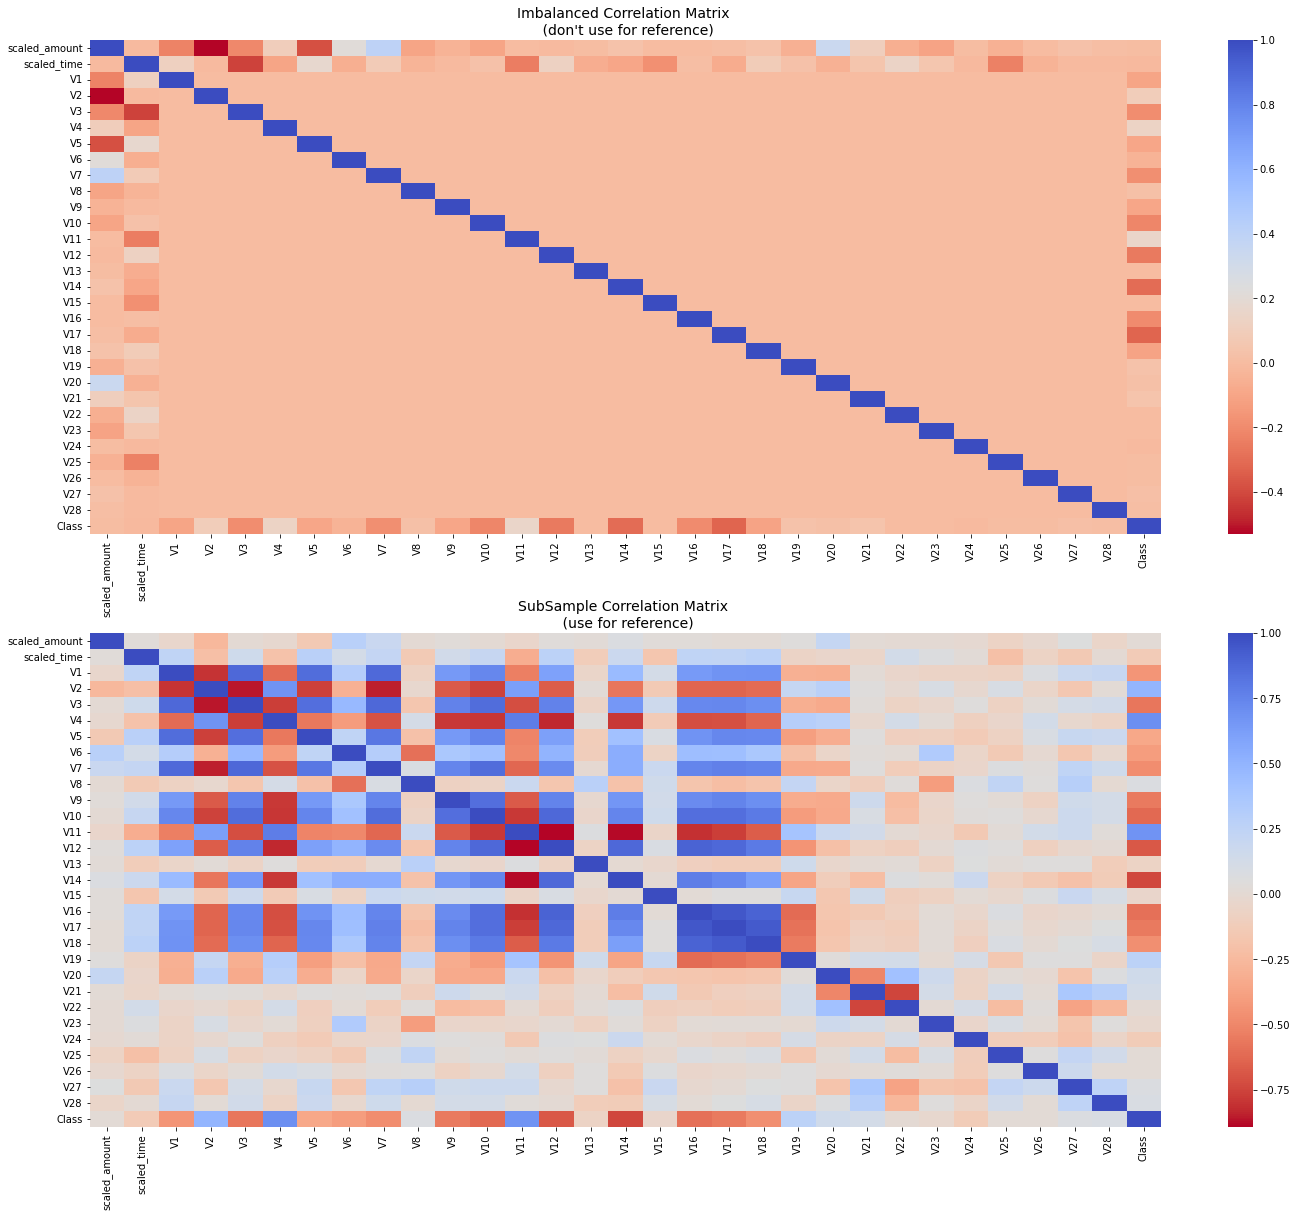

In [70]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Blue => Positively influence => The higher the value, higher chance that the transaction is a fraud.
* V2, V4, V11, V19

Red => Negatively influence => The lower the value, the higher chance that the transaction is a fraud
* V10, V12, V14

### Boxplots

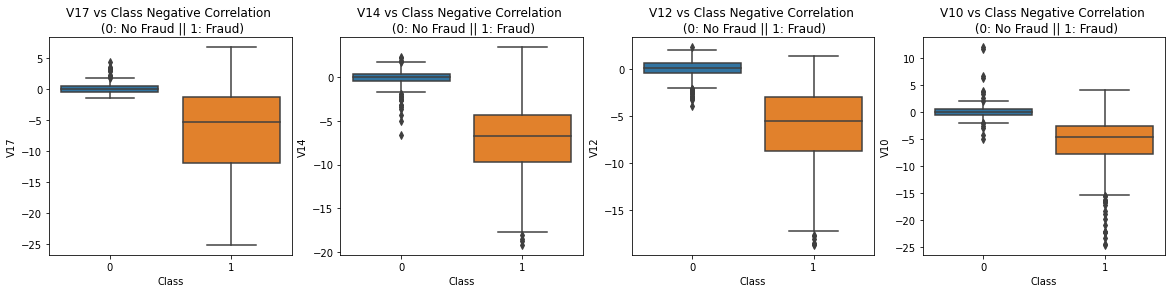

In [71]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation \n (0: No Fraud || 1: Fraud)')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation \n (0: No Fraud || 1: Fraud)')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation \n (0: No Fraud || 1: Fraud)')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation \n (0: No Fraud || 1: Fraud)')

plt.show()

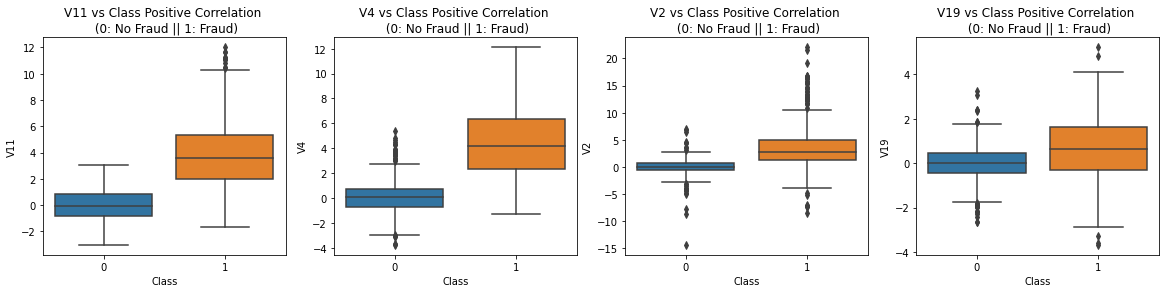

In [72]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation \n (0: No Fraud || 1: Fraud)')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation \n (0: No Fraud || 1: Fraud)')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation \n (0: No Fraud || 1: Fraud)')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation \n (0: No Fraud || 1: Fraud)')

plt.show()

## Anomaly (Outliers) Detection

We want to focus more on the extreme values ,other than just regular outliers. Because we might run the risk of information loss which will cause our models to have a lower accuracy

**Steps:**
1. Visualize the distributions
2. Determining the threshold
3. Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
4. Boxplot representations


### Before outliers removal

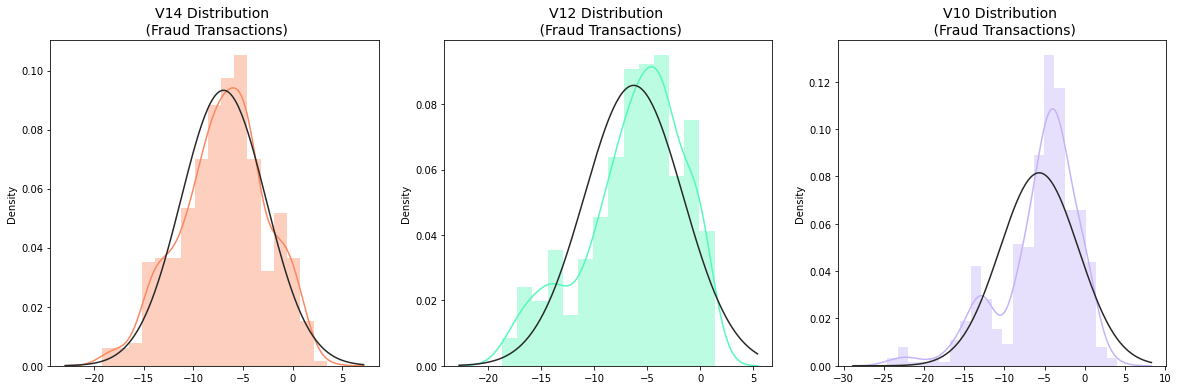

In [73]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [74]:
# The outlier removal method that was made by  aggle solutions are a bit confusing for me
# So I decided to use my old KASDD outlier removal method

def check_outliers(feature):
    q1 = np.percentile(feature, 25)

    q3 = np.percentile(feature, 75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5*iqr)

    upper_bound = q3 + (1.5*iqr)

    outliers = feature[(feature < lower_bound) | (feature > upper_bound)]

    return outliers

def remove_outliers(new_df, feature, feature_col):
    q1 = np.percentile(feature, 25)

    q3 = np.percentile(feature, 75)

    iqr = q3 - q1

    lower_bound = q1 - (1.5*iqr)

    upper_bound = q3 + (1.5*iqr)

    new_df = new_df.drop(new_df[(feature_col > upper_bound) | (feature_col < lower_bound)].index)

    return new_df


In [75]:
# Check outliers on V14
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values

v14_outliers = check_outliers(v14_fraud)

print('Feature V14 Outliers for Fraud Cases: {}'.format(len(v14_outliers)))
print('V14 outliers:{}'.format(v14_outliers))

# Removing outliers on V14
v14_column = df['V14']
print('Number of Instances before outliers removal: {}'.format(len(new_df)))
new_df = remove_outliers(new_df, v14_fraud, v14_column)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.49377336 -19.21432549 -18.04999769 -18.82208674]
Number of Instances before outliers removal: 984
Number of Instances after outliers removal: 980


In [76]:
# Check outliers on V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values

v12_outliers = check_outliers(v12_fraud)

print('Feature V12 Outliers for Fraud Cases: {}'.format(len(v12_outliers)))
print('V12 outliers:{}'.format(v12_outliers))

# Removing outliers on V12
v12_column = df['V12']
print('Number of Instances before outliers removal: {}'.format(len(new_df)))
new_df = remove_outliers(new_df, v12_fraud, v12_column)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Feature V12 Outliers for Fraud Cases: 4
V12 outliers:[-18.04759657 -18.68371463 -18.55369701 -18.43113103]
Number of Instances before outliers removal: 980
Number of Instances after outliers removal: 976


In [77]:
# Check outliers on V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values

v10_outliers = check_outliers(v10_fraud)

print('Feature V10 Outliers for Fraud Cases: {}'.format(len(v10_outliers)))
print('V10 outliers:{}'.format(v10_outliers))

# Removing outliers on V10
v10_column = df['V10']
print('Number of Instances before outliers removal: {}'.format(len(new_df)))
new_df = remove_outliers(new_df, v10_fraud, v10_column)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Feature V10 Outliers for Fraud Cases: 27
V10 outliers:[-15.56379134 -16.74604411 -14.92465477 -22.18708856 -14.92465477
 -17.14151364 -22.18708856 -15.34609885 -24.40318497 -22.18708856
 -15.12375218 -20.94919155 -16.25561175 -16.60119697 -18.27116817
 -16.30353766 -15.12416281 -24.58826244 -15.23996196 -16.64962816
 -22.18708856 -15.23996196 -15.23183337 -19.83614885 -18.91324333
 -23.22825484 -15.56379134]
Number of Instances before outliers removal: 976
Number of Instances after outliers removal: 945


### After outliers removal

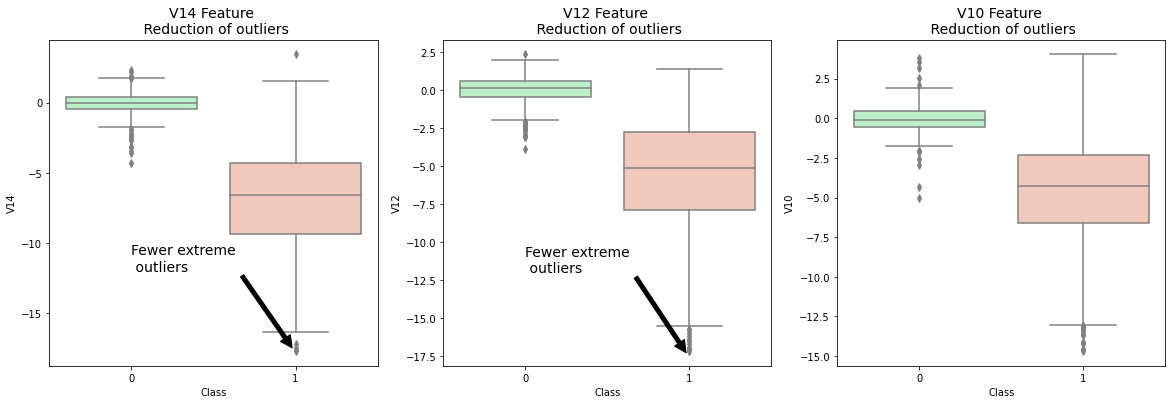

In [78]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

## PCA (Dimensionality Reduction) and Clustering

In [79]:
# t-SNE
# A dimensionality reduction techniques that is particularly useful for visualizing clusters

# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.0 s
PCA took 0.054 s
Truncated SVD took 0.0081 s


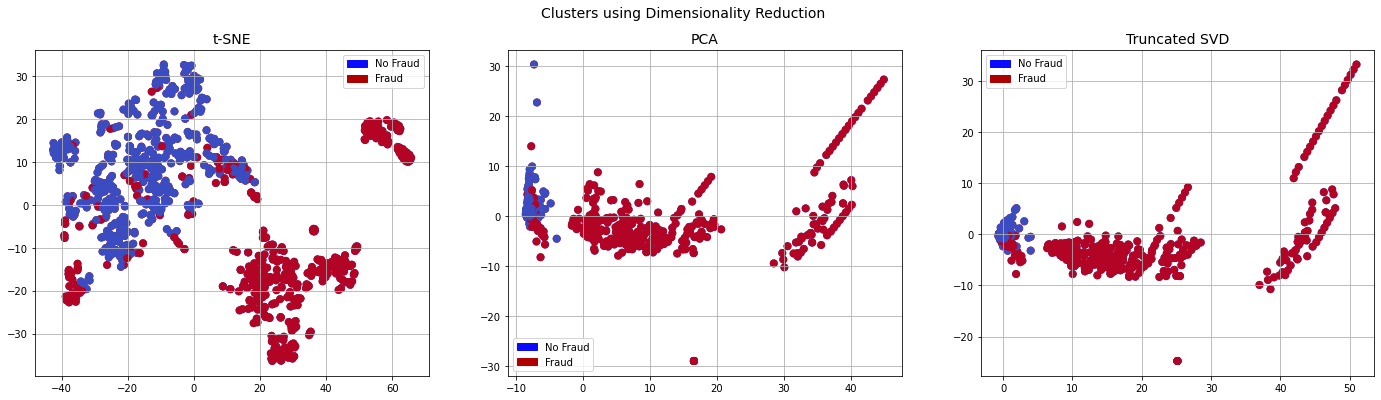

In [80]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

**Conclusion**
* t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset
* Although it took quite longer than the other dimensionality reduction algorithm, but it has the most accurate clustering


## Classifiers (Undersampling):
In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.

In [81]:
# Using the new undersampled dataset
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Split the undersampled dataset
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [83]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [84]:
from sklearn.model_selection import cross_val_score

# Good iterations to evaluate different classifiers all at once
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


**Conclusion**
* LogisticRegression and SVC has the best training score accuracy, and DecisionTreeClassifier has the worst one.

In [85]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print("Logistic Regression best parameter: ", log_reg)

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
print("K-Neighbors Classifier best parameter: ", knears_neighbors)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
print("SVC best parameter: ", svc)

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Decision Tree best parameter: ", tree_clf)

Logistic Regression best parameter:  LogisticRegression(C=0.1)
K-Neighbors Classifier best parameter:  KNeighborsClassifier(n_neighbors=3)
SVC best parameter:  SVC(C=0.5, kernel='linear')
Decision Tree best parameter:  DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [86]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  92.99%
Knears Neighbors Cross Validation Score 92.46%
Support Vector Classifier Cross Validation Score 92.99%
DecisionTree Classifier Cross Validation Score 92.33%


**Conclusion**

Based on the cross validation, too, LogisticRegression and SVC has the best score. It means that LogisticRegression and SVC is also the best model to use to predict unseen data.

In [87]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 51084  51116  51960 ... 284804 284805 284806] Test: [    0     1     2 ... 56970 56971 56972]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 51084  51116  51960 ... 114699 114834 115830]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113920 113921 113922 ... 172726 172793 173899]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170880 170881 170882 ... 227844 227845 227846]
Train: [     0      1      2 ... 227844 227845 227846] Test: [226341 227847 227848 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


### Learning Curves

***Why do we need to learn the curves?***



In [88]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
        
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
                label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
                label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
                label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
                label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
                label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
                label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std, alpha=0.1,
                        color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
                label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
                label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

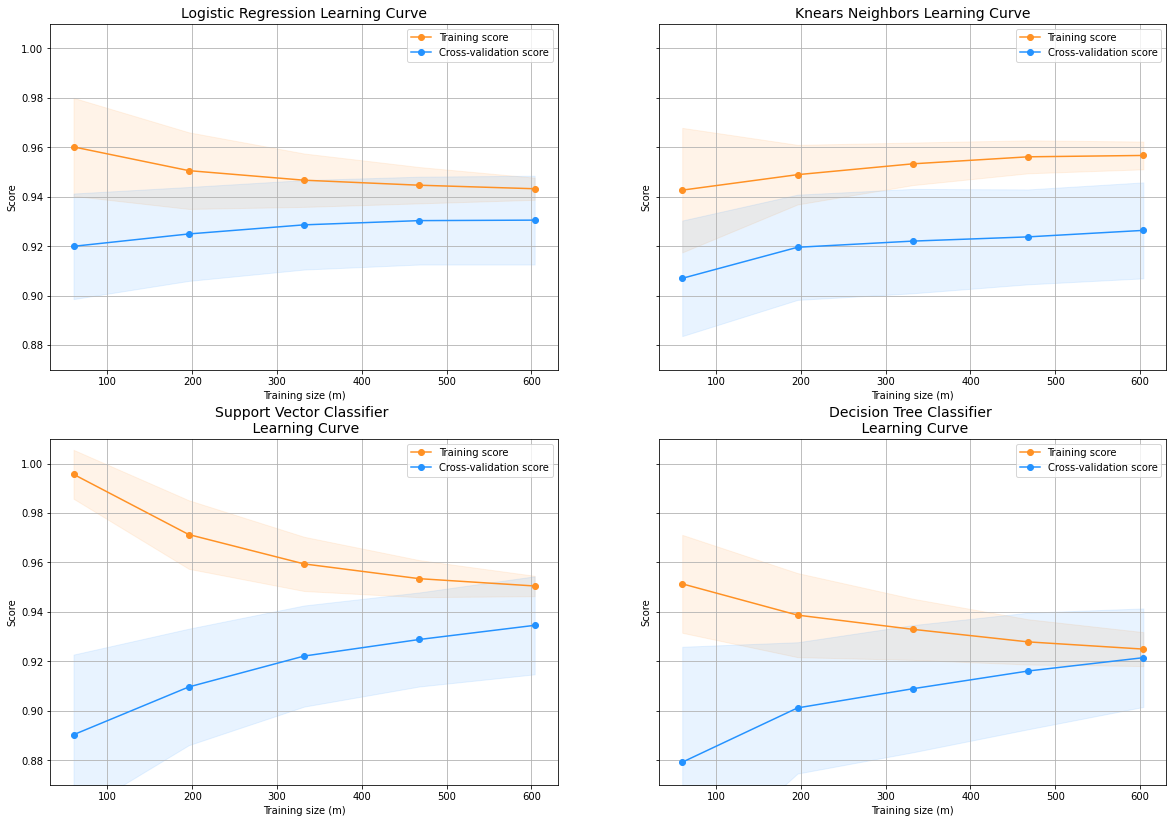

In [89]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

**Conclusion**
* The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
* If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)
* Logistic Regression Classifier shows the best score in both training and cross-validating sets.
* Logistic Regression also has the narrowest gap between the training score and the cross validation score.

In [90]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                            method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                            method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [91]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9773083928821634
KNears Neighbors:  0.923392181588903
Support Vector Classifier:  0.9715146420064452
Decision Tree Classifier:  0.9216897856242118


**Conclusion**
* Based on the prediction score, Logistic Regression also gives out the best score.

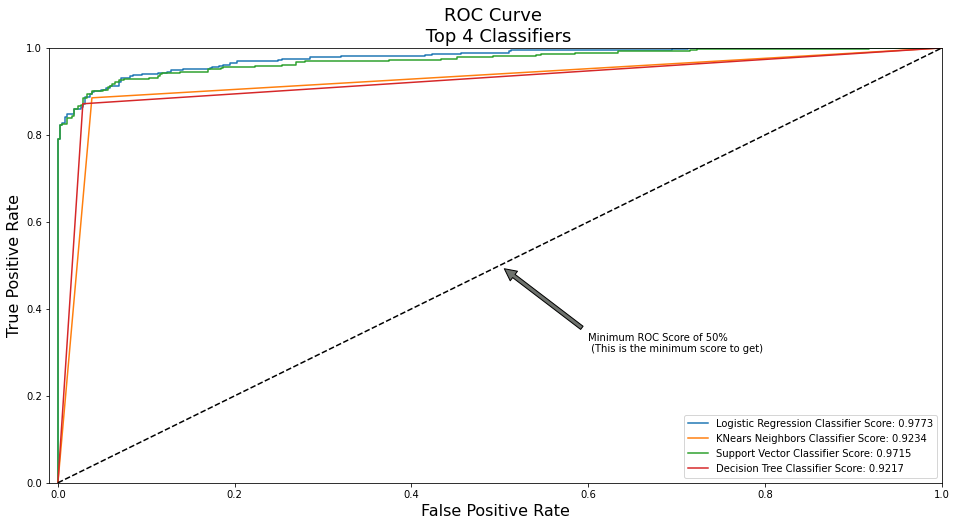

In [92]:
# The visualization of the models' prediction scores comparison
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

**Conclusion** <p>
As it can be seen in the graph above that Logistic Regression has the highest line

## Deeper into Logistic Regression
The previous classifier models evaluation, it can be concluded that Logistic Regression is the best classifier model for our dataset. Hence, in this section, we will delve into Logistic Regression Classifier more further

***Things to remember*** <p>
In this case, Fraud is the Positive case, and Non-fraud is the Negative case
* Precision : depicts  **how precise (how sure)** is our model in detecting fraud transactions
* Recall : **the amount** of fraud cases our model is able to detect.

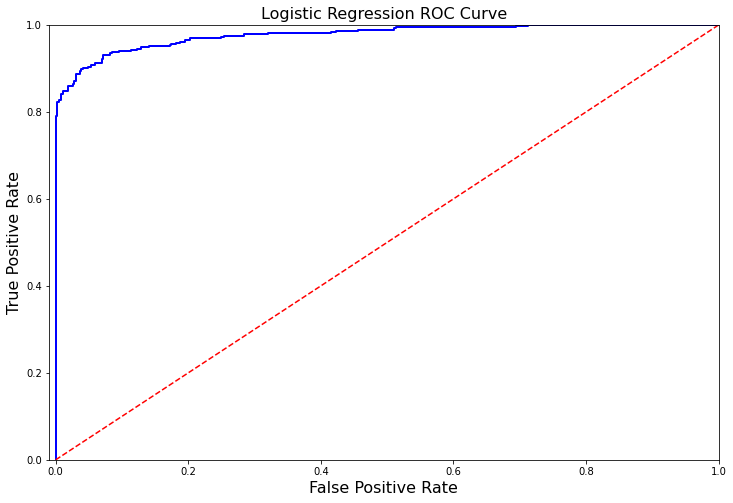

In [93]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [94]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [95]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case 
# Our original dataset
print('---' * 45)
print('Overfitting: (Our original dataset) \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
# The undersampled dataset
print('---' * 45)
print('How it should be: (Our undersampled dataset)\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: (Our original dataset) 

Recall Score: 0.91
Precision Score: 0.75
F1 Score: 0.82
Accuracy Score: 0.81
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be: (Our undersampled dataset)

Accuracy Score: 0.77
Precision Score: 0.00
Recall Score: 0.22
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


To be honest, this part below is quite too intricate. In a way I've found a simpler way to test whether it is better to undersample the dataset or to just let it be.

In [96]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [97]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
    undersample_average_precision))

Average precision-recall score: 0.07


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.07')

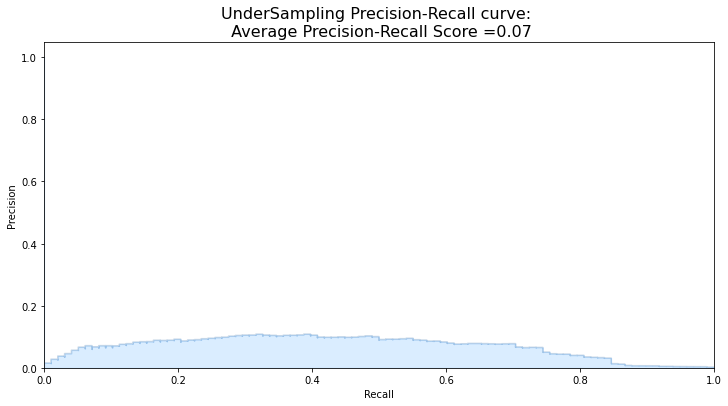

In [98]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
        where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
        undersample_average_precision), fontsize=16)

*A good precision and recall score depends on what the models are for. For example, what the models are for, etc*

## SMOTE Technique (Over-sampling)
SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".


Right now, we are just going to evaluate the accuracy, precision, and recall score of the oversampled data. Then, we are going to compare the classification score between the undersampled and oversampled data.

***Is it better to undersample the majority class or to oversample the minority class?***

Note : If you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem

> **Cross-validate before oversampling or undersampling your data**

In [99]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

# Search for the best parameter
# RandomizedSearchCV is better when dealing with larger dataset. 
# Meanwhile GridSearchCV searches every grid of parameters, making it more suitable for smaller datasets

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
# grid_log_reg.fit(X_train, y_train)
# # We automatically get the logistic regression with the best parameters.
# log_reg = grid_log_reg.best_estimator_

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
# Using pipeline to concatinate multiple transformers and an estimator into a single object. 
# It helps streamline the preprocessing steps and the model training process.
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    smote = SMOTE(sampling_strategy='minority') # SMOTE happens during Cross Validation not before..
    model = rand_log_reg.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(model.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9990344358286567
precision: 0.8592974481658693
recall: 0.5814670561506003
f1: 0.6569868385194537
---------------------------------------------------------------------------------------------------------------------------------------


In [100]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.84      0.43      0.57        98

    accuracy                           1.00     56961
   macro avg       0.92      0.71      0.78     56961
weighted avg       1.00      1.00      1.00     56961



In [101]:
y_score = best_est.decision_function(original_Xtest)

In [102]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
    average_precision))

Average precision-recall score: 0.66


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.66')

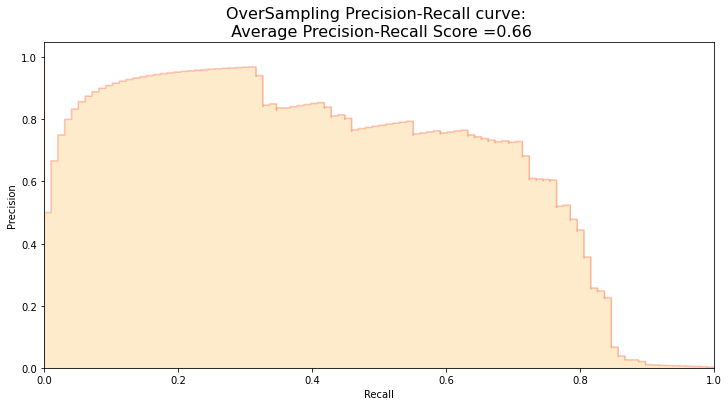

In [103]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
        where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
        average_precision), fontsize=16)

In [115]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
# sm = SMOTE(str='minority', random_state=42)
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [117]:
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took : {} sec".format(t1 - t0))

Fitting oversample data took : 3.1674182415008545 sec


## Test Data with Logistic Regression


### Confusion Matrix:

* Positive/Negative: Type of Class (label) ["Yes", "No"] 
* True/False: Correctly or Incorrectly classified by the model.


True Negatives (Top-Left Square): The number of correctly classifications of the "No" (No Fraud Detected) class.


False Negatives (Top-Right Square): The number of incorrectly classifications of the "No"(No Fraud Detected) class.


False Positives (Bottom-Left Square): The number of incorrectly classifications of the "Yes" (Fraud Detected) class


True Positives (Bottom-Right Square): The number of correctly classifications of the "Yes" (Fraud Detected) class.

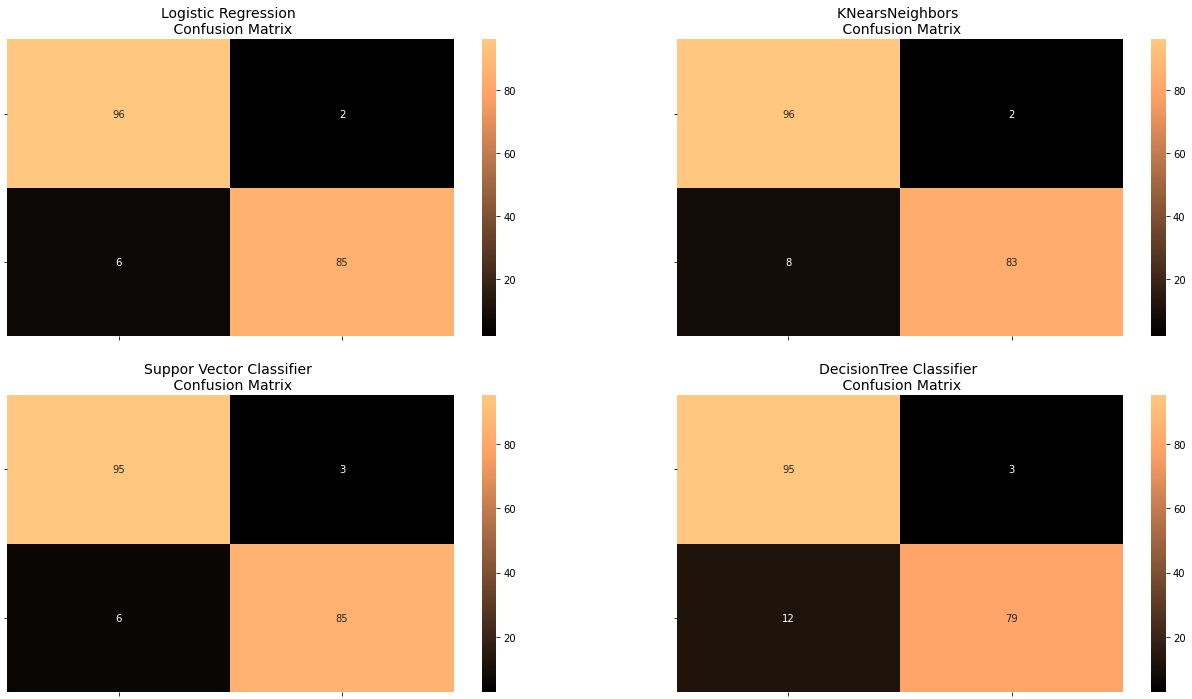

In [118]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [119]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.98      0.93      0.96        91

    accuracy                           0.96       189
   macro avg       0.96      0.96      0.96       189
weighted avg       0.96      0.96      0.96       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        98
           1       0.98      0.91      0.94        91

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        98
           1       0.97      0.93      0.95        91

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted

In [120]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)


# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.957672
1,Oversampling (SMOTE),0.998876


#### Conclusion
> LogisticRegression has the best score and oversampling (SMOTE) has a higher accuracy score. However we cannot just count on the accuracy score since it is not a sole determinant whether that classifier algorithm is the best one or not. Because sometimes the accuracy score is misleading and tend to be always high. Hence, we are using the other metrics as a comparison, such as precision, recall, and f1 score.

## Neural Network Testing Random Undersampling and Oversampling (SMOTE)
In this section we will implement a simple Neural Network (with one hidden layer) in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions.

> So, our main goal is to explore how our simple neural network behaves in both the random undersample and oversample dataframes and see whether they can predict accuractely both non-fraud and fraud cases

We are going to fit this model into our undersample and oversample dataset to predict ***the original outcome*** from the original ***testing*** data

### Undersampling

In [121]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

# Input layer => The number of features
# Hidden layer => 32 nodes
# Output layer => 2 nodes => Fraud or Non-fraud
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'), 
    Dense(2, activation='softmax')
])

In [123]:
# Check the model
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [124]:
# Configures the model for training
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [125]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


2023-06-03 20:48:38.326930: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 - 0s - loss: 0.4977 - accuracy: 0.6672 - val_loss: 0.3728 - val_accuracy: 0.8355 - 334ms/epoch - 13ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3254 - accuracy: 0.9007 - val_loss: 0.3259 - val_accuracy: 0.9013 - 26ms/epoch - 1ms/step
Epoch 3/20
25/25 - 0s - loss: 0.2529 - accuracy: 0.9272 - val_loss: 0.2739 - val_accuracy: 0.8947 - 27ms/epoch - 1ms/step
Epoch 4/20
25/25 - 0s - loss: 0.2054 - accuracy: 0.9338 - val_loss: 0.2377 - val_accuracy: 0.9079 - 27ms/epoch - 1ms/step
Epoch 5/20
25/25 - 0s - loss: 0.1741 - accuracy: 0.9421 - val_loss: 0.2193 - val_accuracy: 0.9079 - 31ms/epoch - 1ms/step
Epoch 6/20
25/25 - 0s - loss: 0.1504 - accuracy: 0.9470 - val_loss: 0.2096 - val_accuracy: 0.9013 - 34ms/epoch - 1ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1355 - accuracy: 0.9487 - val_loss: 0.2187 - val_accuracy: 0.9145 - 31ms/epoch - 1ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1257 - accuracy: 0.9553 - val_loss: 0.1941 - val_accuracy: 0.9211 - 27ms/epoch - 1ms/step
Epoch 9/20
25/25 - 0s - loss: 0.1

In [126]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [128]:
# undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = np.argmax(undersample_model.predict(original_Xtest, batch_size=200, verbose=0), axis=1)

In [129]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55015  1848]
 [    8    90]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


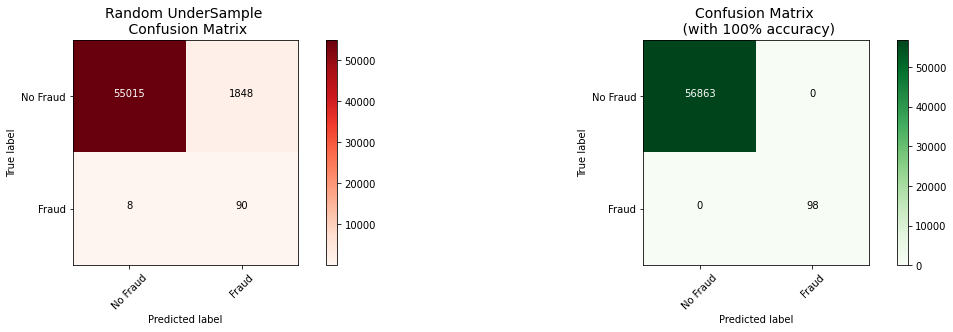

In [130]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Oversampling (SMOTE)

In [131]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [132]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [133]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 1s - loss: 0.0761 - accuracy: 0.9720 - val_loss: 0.0294 - val_accuracy: 0.9911 - 1s/epoch - 1ms/step
Epoch 2/20
1214/1214 - 1s - loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.0135 - val_accuracy: 0.9991 - 644ms/epoch - 530us/step
Epoch 3/20
1214/1214 - 1s - loss: 0.0083 - accuracy: 0.9984 - val_loss: 0.0035 - val_accuracy: 1.0000 - 656ms/epoch - 540us/step
Epoch 4/20
1214/1214 - 1s - loss: 0.0057 - accuracy: 0.9989 - val_loss: 0.0028 - val_accuracy: 0.9999 - 652ms/epoch - 537us/step
Epoch 5/20
1214/1214 - 1s - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0044 - val_accuracy: 1.0000 - 641ms/epoch - 528us/step
Epoch 6/20
1214/1214 - 1s - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0018 - val_accuracy: 1.0000 - 642ms/epoch - 529us/step
Epoch 7/20
1214/1214 - 1s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9996 - 642ms/epoch - 529us/step
Epoch 8/20
1214/1214 - 1s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0123 - val_accuracy: 0.9984 

> From here, we could already see that the model which was trained by the oversample dataset has a higher accuracy than the model which is trained by the undersample dataset

In [134]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [135]:
oversample_fraud_predictions = np.argmax(oversample_model.predict(original_Xtest, batch_size=200, verbose=0), axis=1)

Confusion matrix, without normalization
[[56853    10]
 [   27    71]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


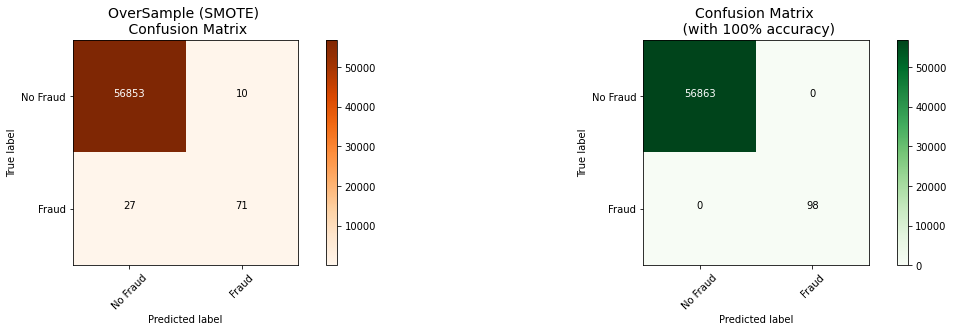

In [136]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

> Then again, we could see that the model which was trained by the oversampled dataset results in a higher accuracy

## Conclusion

- Overall, the model which was trained by the oversampled dataset (SMOTE) results in a higher accuracy prediction than the model which was trained by the undersampled dataset.  Amongst the classifier algorithm, LogisticRegression has the highest accuracy to predict the fraud and non-fraud cases.
- However, one thing to note is that, we removed the outliers from the undersampled dataset, but we did not remove the outliers from the oversampled dataset. This may have affect the accuracy and prediction score result. So, I have to note that in my next exploration, I will try to calculate the accuracy and prediction score of a model that was trained by an oversampled dataset which has been cleared from outliers.
- In my opinion, logically, in these kinds of financial cases, it is preferable to use oversampling instead of undersampling. Why? Because if we use undersampling, we cut off the Non-fraud cases. If we cut off the non-fraud cases, it will decrease the possibility of the case being detected as non-fraud. Hence, it will increase the chance of a non-fraud cases being classified as a fraud cases.
- In a real world case, it must be frustratingly confusing for a customer if their card suddenly got blocked because it was being classified as a fraud case. This kind of misclassification can increase the number of customer complaints and customer disatisfaction.